In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [2]:
df_50 = pd.read_csv("Top_50_Stocks_India.csv", header=1)
df_main = pd.read_csv('All Stocks.csv')

In [3]:
df_main.head()

,Unnamed: 0,Name,LTP,%Chg,Volume,Buy Price,Sell Price,Buy Qty,Sell Qty,Open,Prev.Close,Unnamed: 11
0,0,Adani Ports,750.30,2.07,"4,585,484",0.00,750.30,0,"3,055",737.70,735.10,NaN
1,1,Asian Paints,"3,122.90",1.94,"682,344",0.00,"3,122.90",0,30,"3,089.00","3,063.50",NaN
2,2,Axis Bank,736.05,-0.27,"9,372,897",0.00,736.05,0,"1,026",742.80,738.05,NaN
3,3,Bajaj Auto,"3,635.05",-3.06,"745,428","3,635.05",0.00,129,0,"3,782.00","3,749.95",NaN
4,4,Bajaj Finance,"7,579.10",1.70,"497,128",0.00,"7,579.10",0,11,"7,500.00","7,452.70",NaN


In [4]:
df_50.head()

,0,Name,LTP,%Chg,Volume,Buy Price,Sell Price,Buy Qty,Sell Qty,Open,Prev.Close
0,1,Adani Ports,750.30,2.07,"4,585,484",0.00,750.30,0,"3,055",737.70,735.10
1,2,Asian Paints,"3,122.90",1.94,"682,344",0.00,"3,122.90",0,30,"3,089.00","3,063.50"
2,3,Axis Bank,736.05,-0.27,"9,372,897",0.00,736.05,0,"1,026",742.80,738.05
3,4,Bajaj Auto,"3,635.05",-3.06,"745,428","3,635.05",0.00,129,0,"3,782.00","3,749.95"
4,5,Bajaj Finance,"7,579.10",1.70,"497,128",0.00,"7,579.10",0,11,"7,500.00","7,452.70"


In [5]:
df_50.rename(columns={'0': 'Sl.No'},inplace=True)

In [6]:
df_main.rename(columns={'Unnamed: 0':'Sl.No',"Unnamed: 11" : "Temp"}, inplace=True)

In [7]:
df_main

,Sl.No,Name,LTP,%Chg,Volume,Buy Price,Sell Price,Buy Qty,Sell Qty,Open,Prev.Close,Temp
0,0,Adani Ports,750.30,2.07,"4,585,484",0.00,750.30,0,"3,055",737.70,735.10,NaN
1,1,Asian Paints,"3,122.90",1.94,"682,344",0.00,"3,122.90",0,30,"3,089.00","3,063.50",NaN
2,2,Axis Bank,736.05,-0.27,"9,372,897",0.00,736.05,0,"1,026",742.80,738.05,NaN
3,3,Bajaj Auto,"3,635.05",-3.06,"745,428","3,635.05",0.00,129,0,"3,782.00","3,749.95",NaN
4,4,Bajaj Finance,"7,579.10",1.70,"497,128",0.00,"7,579.10",0,11,"7,500.00","7,452.70",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
507,195,Voltas,"1,264.35",1.24,"569,624",0.00,"1,264.35",0,1,"1,255.50","1,248.90",NaN
508,196,Whirlpool,"2,276.95",-1.73,"254,066","2,276.95",0.00,9,0,"2,330.00","2,317.05",NaN
509,197,Wipro,660.05,2.84,"6,063,253",660.05,0.00,"4,123",0,648.00,641.80,NaN
510,198,Yes Bank,13.15,-0.75,"43,718,885",13.15,0.00,"308,853",0,13.30,13.25,NaN


## Lets do some Feature engineering
**Removing unnecesary columns**


**changing data types of the continuous variables**



**May be add some categorical columns to the dataframe for both the datas**

In [8]:
df_main= df_main[~df_main["Temp"].isnull()==False]
df_main.shape

(508, 12)

In [9]:
df_main.drop(columns=["Sl.No", "Temp"],inplace=True)

In [10]:
df_main.head()

,Name,LTP,%Chg,Volume,Buy Price,Sell Price,Buy Qty,Sell Qty,Open,Prev.Close
0,Adani Ports,750.30,2.07,"4,585,484",0.00,750.30,0,"3,055",737.70,735.10
1,Asian Paints,"3,122.90",1.94,"682,344",0.00,"3,122.90",0,30,"3,089.00","3,063.50"
2,Axis Bank,736.05,-0.27,"9,372,897",0.00,736.05,0,"1,026",742.80,738.05
3,Bajaj Auto,"3,635.05",-3.06,"745,428","3,635.05",0.00,129,0,"3,782.00","3,749.95"
4,Bajaj Finance,"7,579.10",1.70,"497,128",0.00,"7,579.10",0,11,"7,500.00","7,452.70"


In [11]:
df_main.drop_duplicates(inplace=True)

In [12]:
df_main.shape

(199, 10)

In [13]:
def x (l):
    for i in l:
        i.replace(',','')
    return l

In [14]:
df_main.iloc[:,1:]

,LTP,%Chg,Volume,Buy Price,Sell Price,Buy Qty,Sell Qty,Open,Prev.Close
0,750.30,2.07,"4,585,484",0.00,750.30,0,"3,055",737.70,735.10
1,"3,122.90",1.94,"682,344",0.00,"3,122.90",0,30,"3,089.00","3,063.50"
2,736.05,-0.27,"9,372,897",0.00,736.05,0,"1,026",742.80,738.05
3,"3,635.05",-3.06,"745,428","3,635.05",0.00,129,0,"3,782.00","3,749.95"
4,"7,579.10",1.70,"497,128",0.00,"7,579.10",0,11,"7,500.00","7,452.70"
...,...,...,...,...,...,...,...,...,...
304,"2,791.35",-1.53,"754,595",0.00,"2,791.35",0,16,"2,834.60","2,834.60"
306,"1,734.80",1.20,"186,206",0.00,"1,734.80",0,190,"1,722.00","1,714.15"
307,958.60,0.81,"1,530,182",0.00,958.60,0,76,954.00,950.90
309,328.20,1.34,"15,039,279",328.20,0.00,"7,935",0,325.90,323.85


In [15]:
df_main.iloc[:,1:].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 311
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   LTP         199 non-null    object
 1   %Chg        199 non-null    object
 2   Volume      199 non-null    object
 3   Buy Price   199 non-null    object
 4   Sell Price  199 non-null    object
 5   Buy Qty     199 non-null    object
 6   Sell Qty    199 non-null    object
 7   Open        199 non-null    object
 8   Prev.Close  199 non-null    object
dtypes: object(9)
memory usage: 15.5+ KB


In [16]:
df_main["LTP"]= df_main["LTP"].apply(lambda x : float(x.replace(',','')))
df_main["%Chg"]= df_main["%Chg"].apply(lambda x : float(x.replace(',','')))
df_main["Volume"]= df_main["Volume"].apply(lambda x : float(x.replace(',','')))
df_main["Buy Price"]= df_main["Buy Price"].apply(lambda x : float(x.replace(',','')))
df_main["Sell Price"]= df_main["Sell Price"].apply(lambda x : float(x.replace(',','')))
df_main["Buy Qty"]= df_main["Buy Qty"].apply(lambda x : float(x.replace(',','')))
df_main["Sell Qty"]= df_main["Sell Qty"].apply(lambda x : float(x.replace(',','')))
df_main["Open"]= df_main["Open"].apply(lambda x : float(x.replace(',','')))
df_main["Prev.Close"]= df_main["Prev.Close"].apply(lambda x : float(x.replace(',','')))

In [17]:
df_main.iloc[:,1:].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 311
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LTP         199 non-null    float64
 1   %Chg        199 non-null    float64
 2   Volume      199 non-null    float64
 3   Buy Price   199 non-null    float64
 4   Sell Price  199 non-null    float64
 5   Buy Qty     199 non-null    float64
 6   Sell Qty    199 non-null    float64
 7   Open        199 non-null    float64
 8   Prev.Close  199 non-null    float64
dtypes: float64(9)
memory usage: 15.5 KB


In [18]:

df_50.drop(columns=["Sl.No"], inplace=True)
df_50.iloc[:,1:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LTP         50 non-null     object 
 1   %Chg        50 non-null     float64
 2   Volume      50 non-null     object 
 3   Buy Price   50 non-null     object 
 4   Sell Price  50 non-null     object 
 5   Buy Qty     50 non-null     object 
 6   Sell Qty    50 non-null     object 
 7   Open        50 non-null     object 
 8   Prev.Close  50 non-null     object 
dtypes: float64(1), object(8)
memory usage: 3.6+ KB


In [19]:
df_50["LTP"]= df_50["LTP"].apply(lambda x : float(x.replace(',','')))
df_50["Volume"]= df_50["Volume"].apply(lambda x : float(x.replace(',','')))
df_50["Buy Price"]= df_50["Buy Price"].apply(lambda x : float(x.replace(',','')))
df_50["Sell Price"]= df_50["Sell Price"].apply(lambda x : float(x.replace(',','')))
df_50["Buy Qty"]= df_50["Buy Qty"].apply(lambda x : float(x.replace(',','')))
df_50["Sell Qty"]= df_50["Sell Qty"].apply(lambda x : float(x.replace(',','')))
df_50["Open"]= df_50["Open"].apply(lambda x : float(x.replace(',','')))
df_50["Prev.Close"]= df_50["Prev.Close"].apply(lambda x : float(x.replace(',','')))
df_50.iloc[:,1:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LTP         50 non-null     float64
 1   %Chg        50 non-null     float64
 2   Volume      50 non-null     float64
 3   Buy Price   50 non-null     float64
 4   Sell Price  50 non-null     float64
 5   Buy Qty     50 non-null     float64
 6   Sell Qty    50 non-null     float64
 7   Open        50 non-null     float64
 8   Prev.Close  50 non-null     float64
dtypes: float64(9)
memory usage: 3.6 KB


In [20]:
df_main.head()

df_main["Status"]= df_main["%Chg"].apply(lambda x: "loss" if x<0 else "profit")
df_main.sort_values(["Volume"], ascending=False)


,Name,LTP,%Chg,Volume,Buy Price,Sell Price,Buy Qty,Sell Qty,Open,Prev.Close,Status
158,Vodafone Idea,10.30,4.57,285024686.0,0.00,10.30,0.0,390752.0,9.95,9.85,profit
311,Yes Bank,13.15,-0.75,43718885.0,13.15,0.00,308853.0,0.0,13.30,13.25,loss
150,Tata Power,239.85,0.04,42038250.0,239.85,0.00,497.0,0.0,242.00,239.75,profit
78,BHEL,65.15,0.54,36992832.0,0.00,65.15,0.0,56549.0,65.00,64.80,profit
59,PNB,41.75,-0.24,28798008.0,41.75,0.00,2376.0,0.0,42.20,41.85,loss
...,...,...,...,...,...,...,...,...,...,...,...
142,Sanofi India,8290.35,3.34,17339.0,8290.35,0.00,56.0,0.0,8035.00,8022.35,profit
289,P and G,14867.30,1.52,16118.0,0.00,14867.30,0.0,3.0,14754.85,14644.95,profit
135,Pfizer,5129.50,-0.21,13231.0,0.00,5129.50,0.0,7.0,5183.85,5140.30,loss
279,MRF,78174.85,1.25,11688.0,78174.85,0.00,1.0,0.0,77580.00,77210.90,profit


In [21]:
df_cat=pd.read_csv("Cleansed_categorical_data.csv")
df_cat.head()

,Unnamed: 0,Name,LTP,P/E,Debt_to_equity,ESP,BVPS,Net_Profit(RS.cr),DSP(RS.),NPM%,ROE%,Category,Status
0,0,Amara Raja Batt,665.55,22.55,0.01,37.87,246.49,646.0,11.0,9.04,15.36,NIFTY_AUTO,profit
1,1,Ashok Leyland,146.00,-106.07,0.53,-1.07,23.77,-313.0,0.0,-2.05,-4.49,NIFTY_AUTO,loss
2,2,Bajaj Auto,3583.80,21.86,0.00,167.90,942.51,4550.0,140.0,16.40,17.80,NIFTY_AUTO,profit
3,3,Balkrishna Ind,2322.15,27.72,0.17,60.91,310.39,1177.0,17.0,20.36,19.62,NIFTY_AUTO,profit
4,4,Bharat Forge,802.75,-219.91,0.85,-2.71,116.98,-96.0,2.0,-1.53,-2.33,NIFTY_AUTO,loss


In [22]:
def cat(x):
    if x>0 and x<50:
        return "Expect_decent_grouwth"
    elif x>=50 and x<=200:
        return "Expect_good_grouwth"
    elif x>200:
        return "Huge_growth_potential/Over_valued"
    else:
        return "Least potential"
def cat1(x):
    if x>0 and x<=12:
        return "marginal_profit"
    elif x>12 and x<=29:
        return "Decent_Profit"
    elif x>29:
        return "huge_profit"
    else:
        return "Loss"
        

In [23]:
df_cat["Status"] = df_cat["P/E"].apply(cat)

In [24]:
df_cat["Profit_status"]= df_cat["NPM%"].apply(cat1)

In [25]:
df_cat.head()

,Unnamed: 0,Name,LTP,P/E,Debt_to_equity,ESP,BVPS,Net_Profit(RS.cr),DSP(RS.),NPM%,ROE%,Category,Status,Profit_status
0,0,Amara Raja Batt,665.55,22.55,0.01,37.87,246.49,646.0,11.0,9.04,15.36,NIFTY_AUTO,Expect_decent_grouwth,marginal_profit
1,1,Ashok Leyland,146.00,-106.07,0.53,-1.07,23.77,-313.0,0.0,-2.05,-4.49,NIFTY_AUTO,Least potential,Loss
2,2,Bajaj Auto,3583.80,21.86,0.00,167.90,942.51,4550.0,140.0,16.40,17.80,NIFTY_AUTO,Expect_decent_grouwth,Decent_Profit
3,3,Balkrishna Ind,2322.15,27.72,0.17,60.91,310.39,1177.0,17.0,20.36,19.62,NIFTY_AUTO,Expect_decent_grouwth,Decent_Profit
4,4,Bharat Forge,802.75,-219.91,0.85,-2.71,116.98,-96.0,2.0,-1.53,-2.33,NIFTY_AUTO,Least potential,Loss


In [26]:
df_cat.drop(columns=["Unnamed: 0"],inplace=True)

## Lets do some Exploratory Data Analysis on the information we gathered

<AxesSubplot:ylabel='Net_Profit(RS.cr)'>

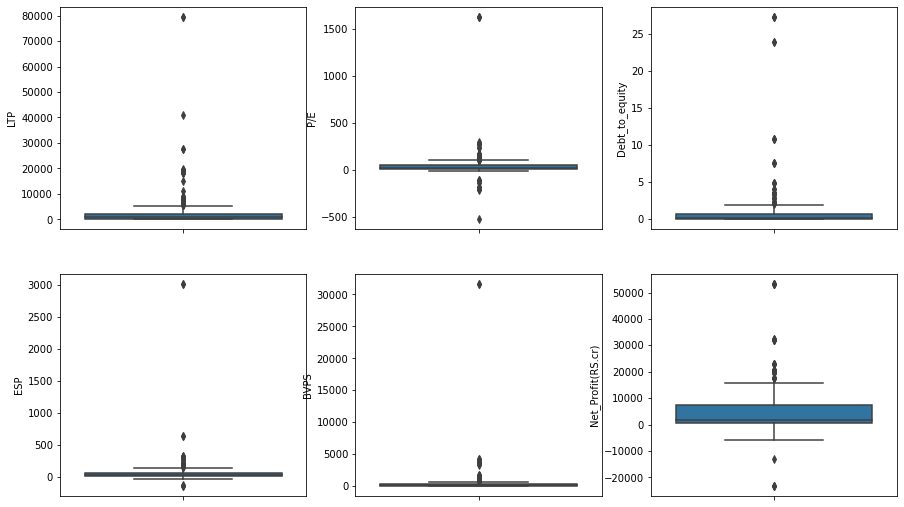

In [27]:
plt.figure(figsize=(15,9))
plt.subplot(2,3,1)
sns.boxplot(data=df_cat, y="LTP")
plt.subplot(2,3,2)
sns.boxplot(data=df_cat, y="P/E")
plt.subplot(2,3,3)
sns.boxplot(data=df_cat, y="Debt_to_equity")
plt.subplot(2,3,4)
sns.boxplot(data=df_cat, y="ESP")
plt.subplot(2,3,5)
sns.boxplot(data=df_cat, y="BVPS")
plt.subplot(2,3,6)
sns.boxplot(data=df_cat, y="Net_Profit(RS.cr)")

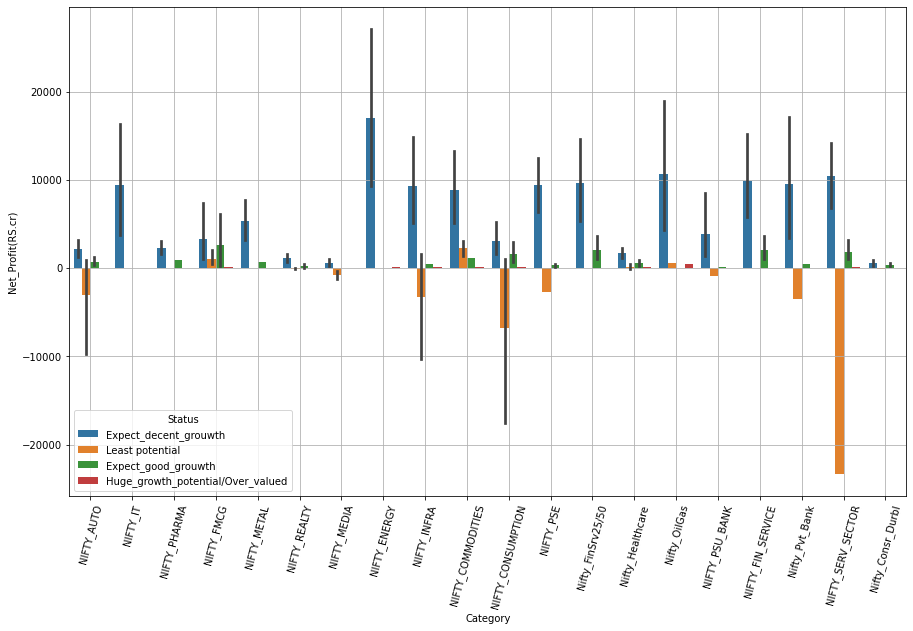

In [28]:
plt.figure(figsize=(15,9))
sns.barplot(data=df_cat, x="Category", y="Net_Profit(RS.cr)", hue="Status" )
plt.xticks(rotation=75)
plt.grid()

## Service Sector is taking a huge blow in the Market Energy sector is having a good potential

In [29]:
df_cat.to_csv("Tableau_Analyis.csv")

In [30]:
df_cat.head()

,Name,LTP,P/E,Debt_to_equity,ESP,BVPS,Net_Profit(RS.cr),DSP(RS.),NPM%,ROE%,Category,Status,Profit_status
0,Amara Raja Batt,665.55,22.55,0.01,37.87,246.49,646.0,11.0,9.04,15.36,NIFTY_AUTO,Expect_decent_grouwth,marginal_profit
1,Ashok Leyland,146.00,-106.07,0.53,-1.07,23.77,-313.0,0.0,-2.05,-4.49,NIFTY_AUTO,Least potential,Loss
2,Bajaj Auto,3583.80,21.86,0.00,167.90,942.51,4550.0,140.0,16.40,17.80,NIFTY_AUTO,Expect_decent_grouwth,Decent_Profit
3,Balkrishna Ind,2322.15,27.72,0.17,60.91,310.39,1177.0,17.0,20.36,19.62,NIFTY_AUTO,Expect_decent_grouwth,Decent_Profit
4,Bharat Forge,802.75,-219.91,0.85,-2.71,116.98,-96.0,2.0,-1.53,-2.33,NIFTY_AUTO,Least potential,Loss


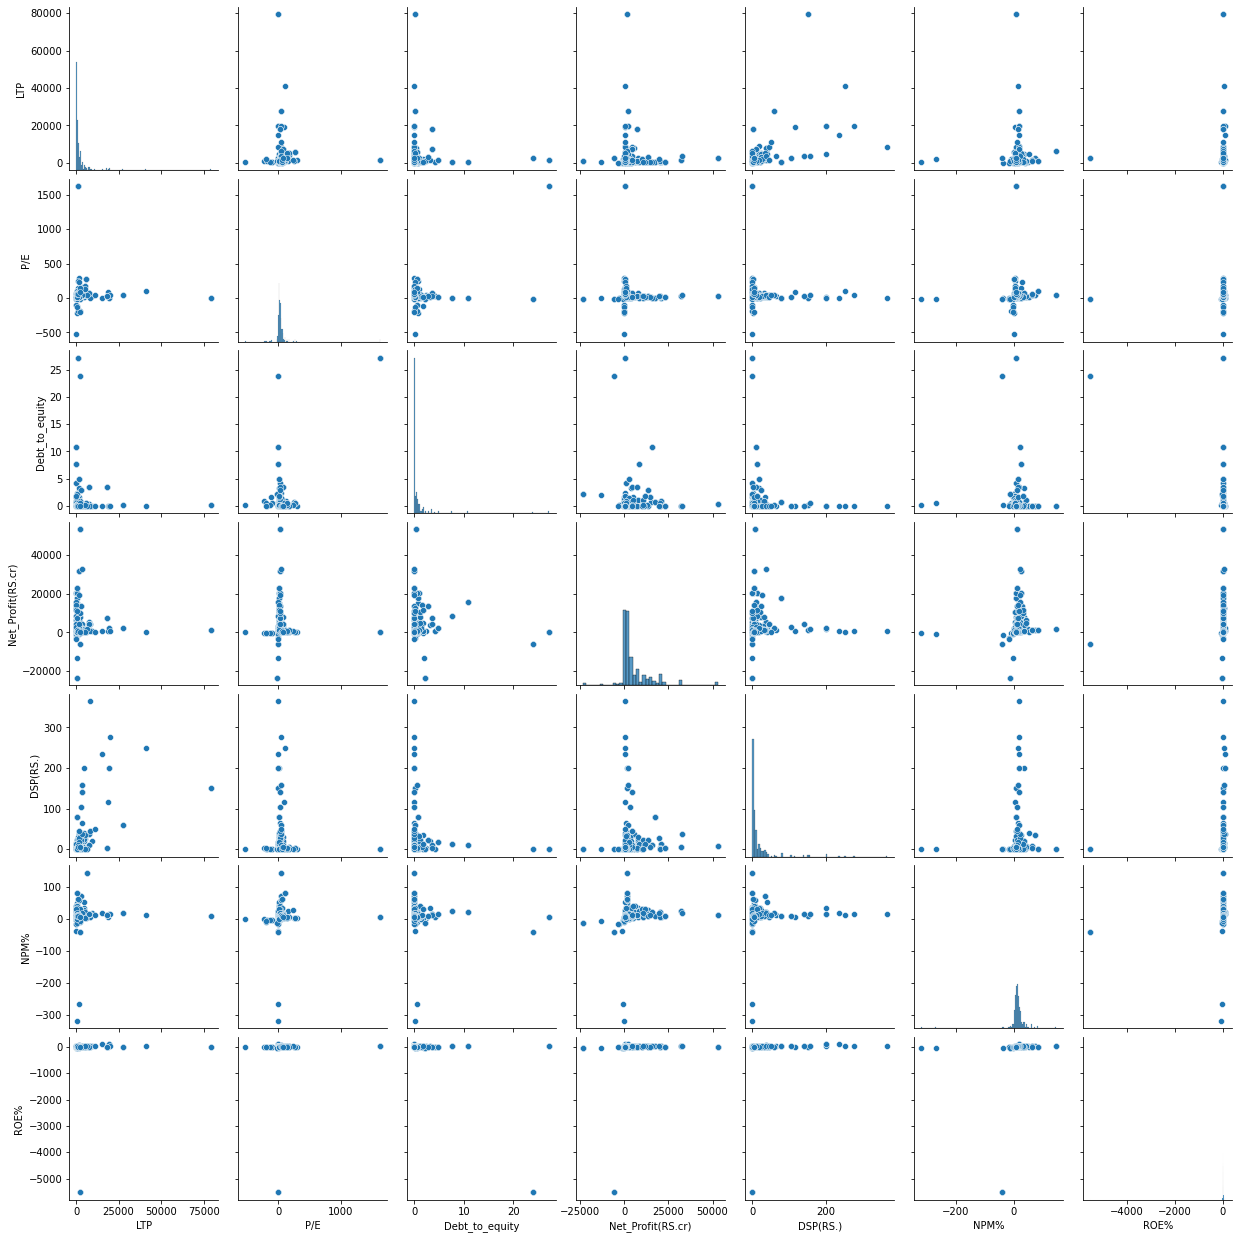

In [35]:
sns.pairplot (data= df_cat , y_vars=["LTP", "P/E", "Debt_to_equity", "Net_Profit(RS.cr)", "DSP(RS.)","NPM%", "ROE%" ], x_vars=["LTP", "P/E", "Debt_to_equity", "Net_Profit(RS.cr)", "DSP(RS.)","NPM%", "ROE%" ])

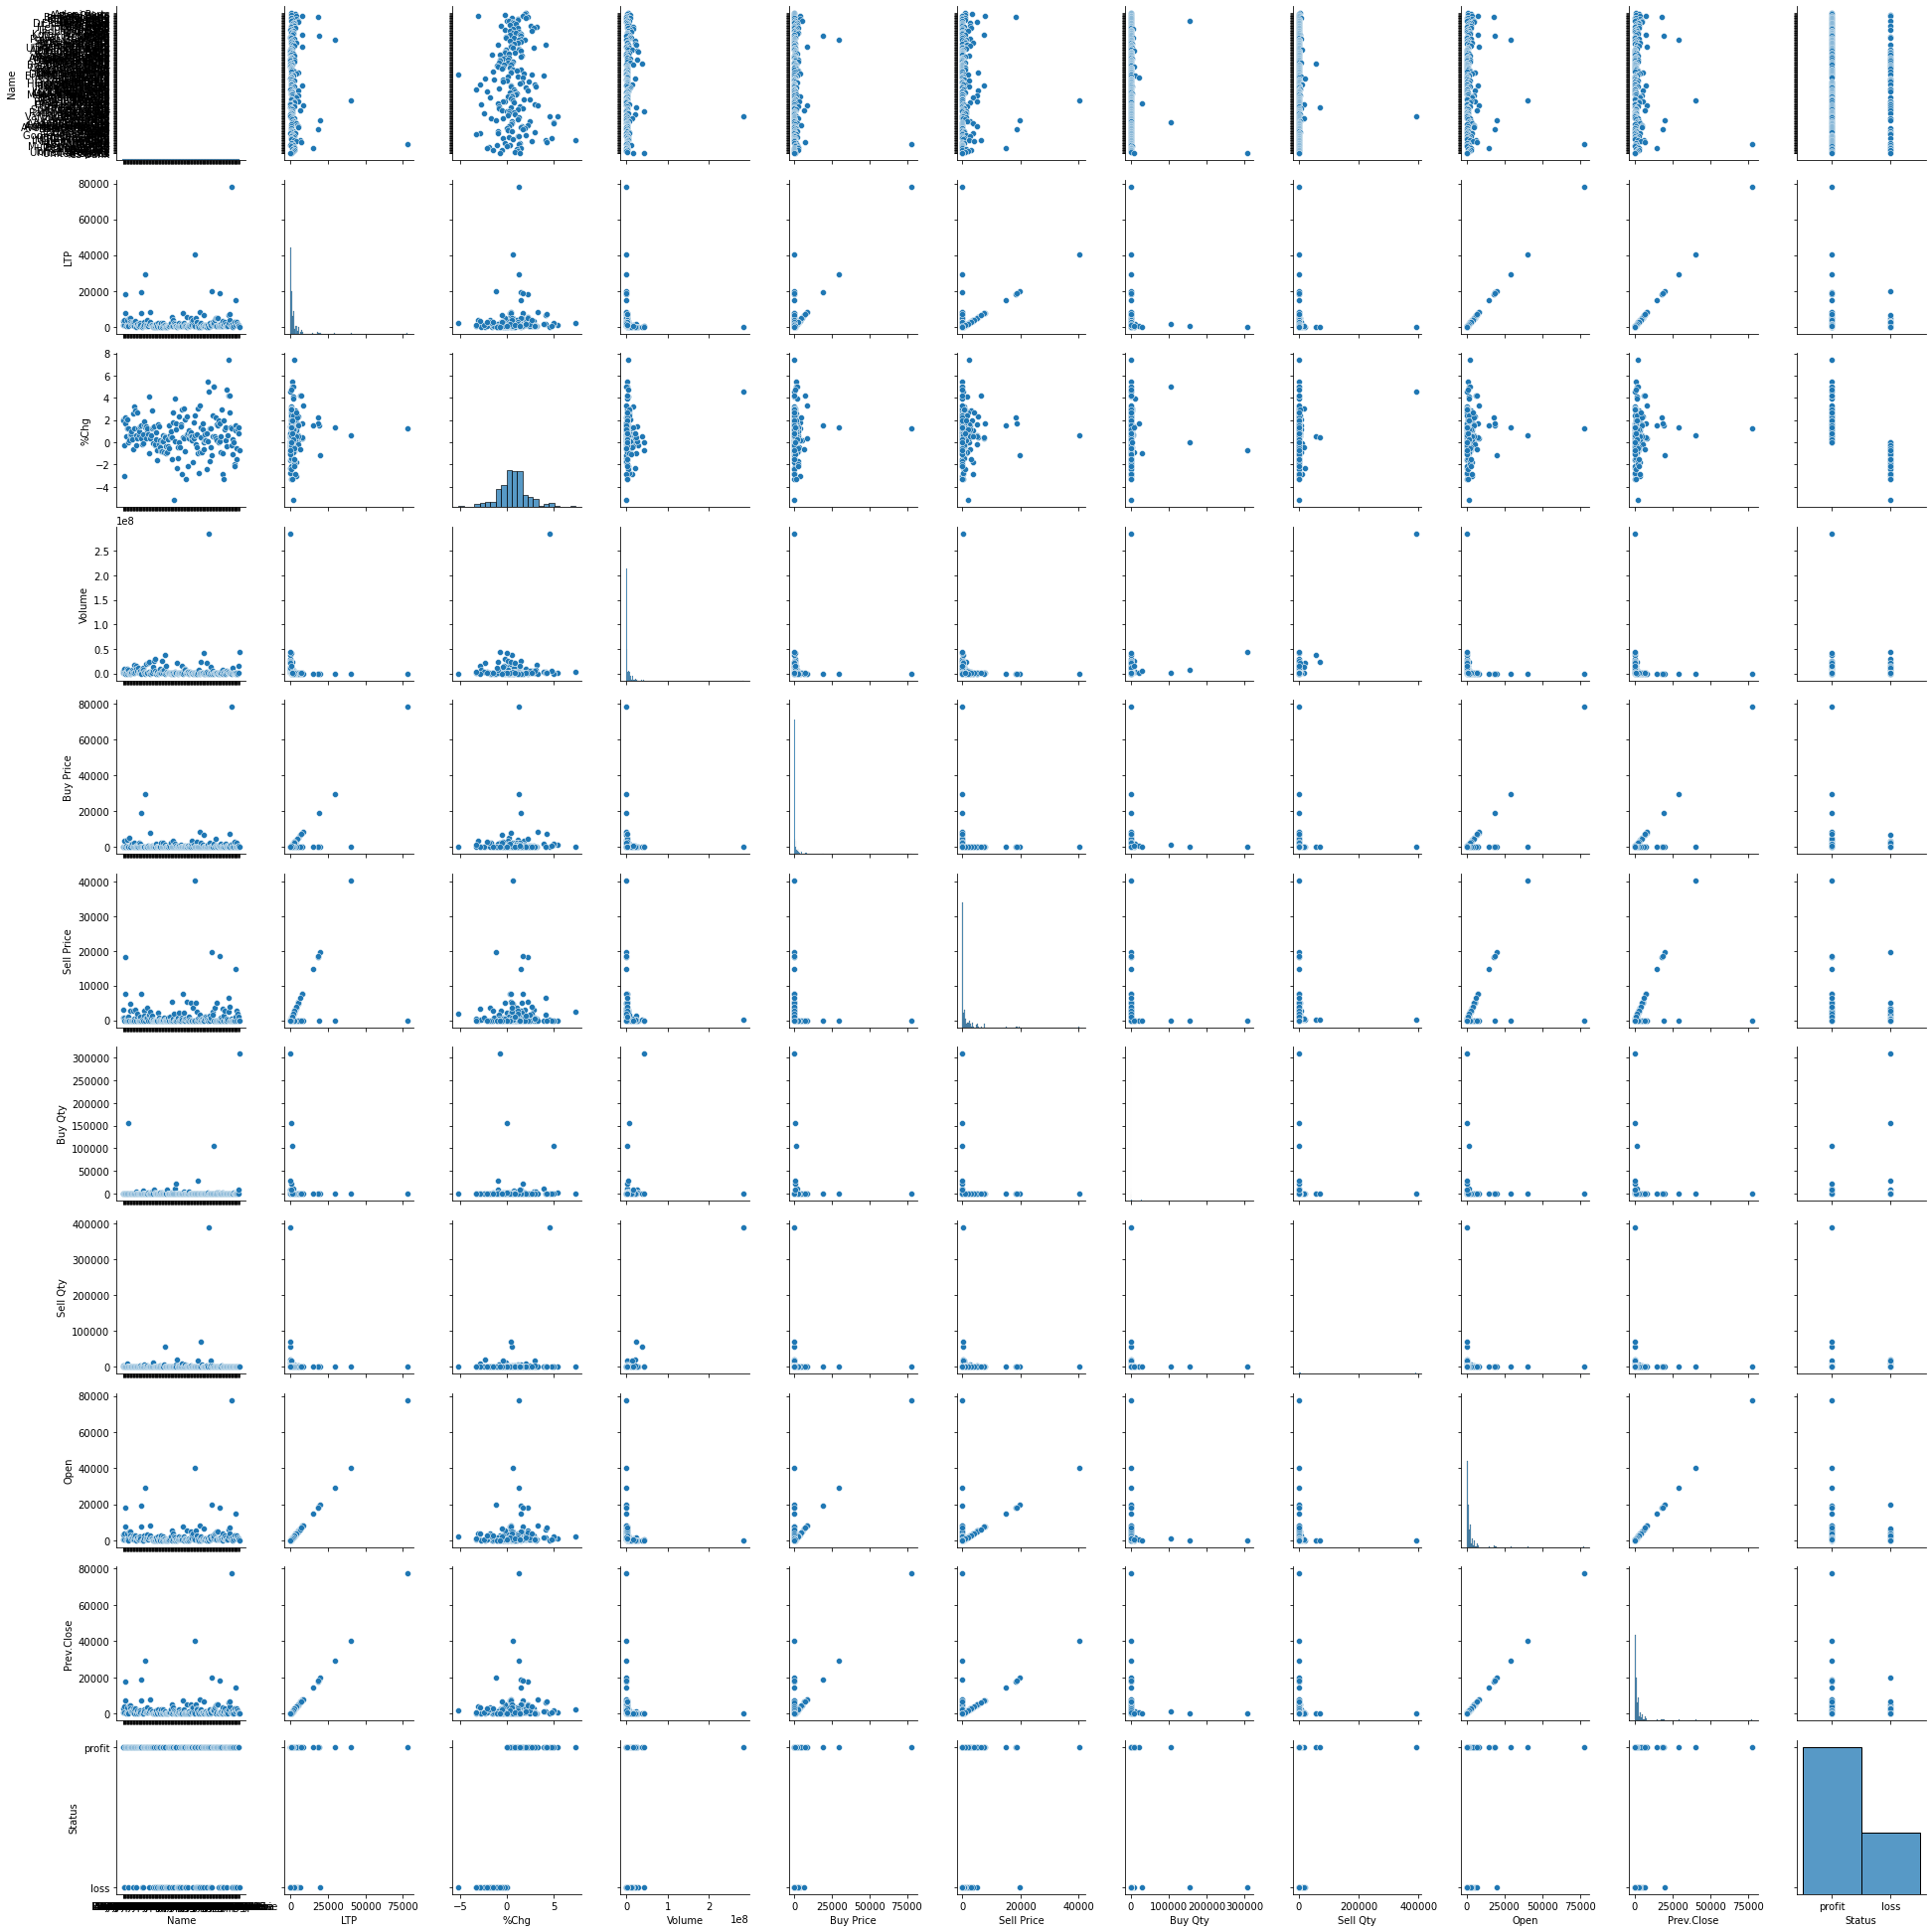

In [37]:
sns.pairplot (data= df_main , y_vars=df_main.columns, x_vars=df_main.columns)

<AxesSubplot:xlabel='Open', ylabel='Prev.Close'>

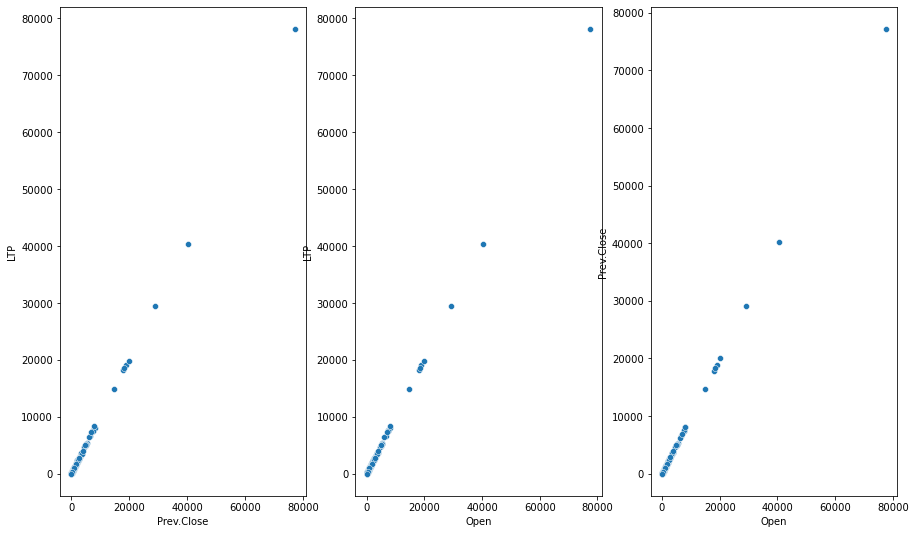

In [45]:
plt.figure(figsize=(15,9))
plt.subplot(1,3,1)
sns.scatterplot(data=df_main, x="Prev.Close", y="LTP")
plt.subplot(1,3,2)
sns.scatterplot(data=df_main, x="Open", y="LTP")
plt.subplot(1,3,3)
sns.scatterplot(data=df_main, x="Open", y="Prev.Close")


# Simple Linear Regression

In this notebook, we'll build a linear regression model to predict `Last Trade Price` using an appropriate predictor variable.

In [46]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels
import statsmodels.api  as sm 

In [66]:
X = df_main[["Open", "Prev.Close"]]
y= df_main.LTP

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.70,random_state=100 )

In [68]:
X_train_sm = sm.add_constant(X_train) 
X_train.head()

,Open,Prev.Close
81,138.60,137.70
3,3782.00,3749.95
277,552.35,548.20
26,231.20,230.00
100,256.65,254.35


In [69]:
lr=sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const        -4.847132
Open          0.740270
Prev.Close    0.268946
dtype: float64

In [70]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LTP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.853e+06
Date:                Sun, 21 Nov 2021   Prob (F-statistic):          2.49e-302
Time:                        12:38:01   Log-Likelihood:                -725.20
No. Observations:                 139   AIC:                             1456.
Df Residuals:                     136   BIC:                             1465.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.8471      4.048     -1.197      0.233     -12.852       3.158
Open           0.7403      0.210      3.524      0.001       0.325       1.156
Prev.Close     0.2689      0.211      1.273      0.205      -0.149       0.687
==============================================================================
Omnibus:                       49.962   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              430.518
Skew:                           0.932   Prob(JB):                     3.27e-94
Kurtosis:                      11.418   Cond. No.                     1.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
y_train_pred= lr_model.predict(X_train_sm) 

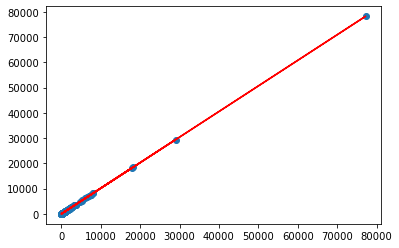

In [77]:
plt.scatter(X_train["Prev.Close"],y_train)
plt.plot(X_train["Prev.Close"], y_train_pred, 'r')

In [ ]:
plt.scatter(X_train.Open,y_train)
plt.plot(X_train.Open, y_train_pred, 'r')

Text(0.5, 1.0, 'Resedual Plot')

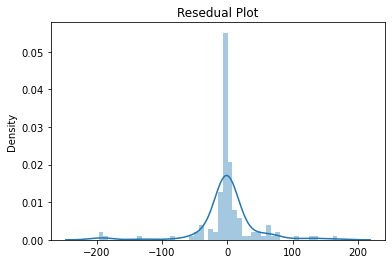

In [78]:
res= (y_train_pred-y_train)
sns.distplot(res)
plt.title("Resedual Plot")

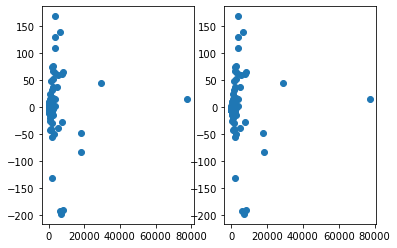

In [82]:
plt.subplot(1,2,1)
plt.scatter(X_train.Open, res)
plt.subplot(1,2,2)
plt.scatter(X_train['Prev.Close'], res)


In [83]:
X_test_sm = sm.add_constant(X_test) 
y_test_pred= lr_model.predict(X_test_sm)

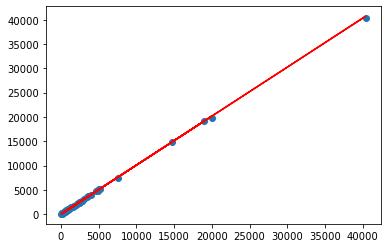

In [84]:
plt.scatter(X_test.Open,y_test)
plt.plot(X_test.Open, y_test_pred, 'r')

In [85]:
r2= r2_score(y_true=y_test,y_pred=y_test_pred)
r2

0.9998661908892007

In [86]:
mean_squared_error(y_true=y_test, y_pred=y_test_pred)

5159.820685774085

## It follows  
## LTP = -4.8471 + 0.7403 x Open
## LTP= -4.8471 + 0.2689 x Prev.Close

## We have a high R2 value that means our predictive model is working